In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [149]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["score_difference", "relative_strength", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [150]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2024
skipping  2024
Loading data for 2023
  Processing 272 CSV files in parallel with 8 workers.

In [151]:
# Get information about the data
training_data = dict(sorted(training_data.items()))
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 3244
timestep: 0.005, number of instances: 1142
timestep: 0.01, number of instances: 2157
timestep: 0.015, number of instances: 1805
timestep: 0.02, number of instances: 2016
timestep: 0.025, number of instances: 2086
timestep: 0.03, number of instances: 1976
timestep: 0.035, number of instances: 2157
timestep: 0.04, number of instances: 2047
timestep: 0.045, number of instances: 2177
timestep: 0.05, number of instances: 2126
timestep: 0.055, number of instances: 2038
timestep: 0.06, number of instances: 2220
timestep: 0.065, number of instances: 2157
timestep: 0.07, number of instances: 2181
timestep: 0.075, number of instances: 2135
timestep: 0.08, number of instances: 2193
timestep: 0.085, number of instances: 2211
timestep: 0.09, number of instances: 2122
timestep: 0.095, number of instances: 2207
timestep: 0.1, number of instances: 2178
timestep: 0.105, number of instances: 2161
timestep: 0.11, number of instances: 2234
timestep: 0.115, number o

In [152]:
for timestep in test_data:
    print(f"timestep: {timestep}, number of instances: {len(test_data[timestep])}")

timestep: 0.0, number of instances: 343
timestep: 0.005, number of instances: 426
timestep: 0.01, number of instances: 373
timestep: 0.015, number of instances: 476
timestep: 0.02, number of instances: 378
timestep: 0.025, number of instances: 481
timestep: 0.03, number of instances: 418
timestep: 0.035, number of instances: 455
timestep: 0.04, number of instances: 476
timestep: 0.045, number of instances: 430
timestep: 0.05, number of instances: 468
timestep: 0.055, number of instances: 501
timestep: 0.06, number of instances: 466
timestep: 0.065, number of instances: 470
timestep: 0.07, number of instances: 459
timestep: 0.075, number of instances: 500
timestep: 0.08, number of instances: 477
timestep: 0.085, number of instances: 437
timestep: 0.09, number of instances: 522
timestep: 0.095, number of instances: 464
timestep: 0.1, number of instances: 503
timestep: 0.105, number of instances: 474
timestep: 0.11, number of instances: 477
timestep: 0.115, number of instances: 458
timest

In [153]:
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]

In [154]:
# Setup model for each timestep
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# create an array of logistic regression models

modules_to_reload = [
    'models.logistic_regression',
    'models.Model'
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
from models.Model import Model
from models.logistic_regression import setup_logistic_regression_models

models = setup_logistic_regression_models(training_data, validation_data, numeric_features, other_features, features, optimize_hyperparams=True, use_calibration=False)


Processing timestep: 0.0


Best trial: 22. Best value: 0.636018:  54%|█████▍    | 27/50 [00:07<00:04,  5.14it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 48. Best value: 0.635141: 100%|██████████| 50/50 [00:09<00:00,  5.34it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 0.00% (Optimized): Training Loss = 0.6255, Accuracy = 0.6427, Test Loss = 0.6351, Test Accuracy = 0.6616
Processing timestep: 0.005


Best trial: 8. Best value: 0.689251:  38%|███▊      | 19/50 [00:04<00:06,  4.90it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 42. Best value: 0.67954: 100%|██████████| 50/50 [00:07<00:00,  6.71it/s] 


Timestep 0.50% (Optimized): Training Loss = 0.6431, Accuracy = 0.6305, Test Loss = 0.6795, Test Accuracy = 0.5645
Processing timestep: 0.01


Best trial: 47. Best value: 0.642518: 100%|██████████| 50/50 [00:06<00:00,  8.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 1.00% (Optimized): Training Loss = 0.6169, Accuracy = 0.6477, Test Loss = 0.6425, Test Accuracy = 0.6177
Processing timestep: 0.015


Best trial: 5. Best value: 0.650608:  12%|█▏        | 6/50 [00:03<00:29,  1.51it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 5. Best value: 0.650608:  20%|██        | 10/50 [00:05<00:20,  1.98it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 10. Best value: 0.650236:  22%|██▏       | 11/50 [00:06<00:27,  1.41it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 10. Best valu

Timestep 1.50% (Optimized): Training Loss = 0.6332, Accuracy = 0.6283, Test Loss = 0.6461, Test Accuracy = 0.6458
Processing timestep: 0.02


Best trial: 25. Best value: 0.671029: 100%|██████████| 50/50 [00:10<00:00,  4.62it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 2.00% (Optimized): Training Loss = 0.6349, Accuracy = 0.6409, Test Loss = 0.6710, Test Accuracy = 0.5813
Processing timestep: 0.025


Best trial: 43. Best value: 0.630809: 100%|██████████| 50/50 [00:08<00:00,  6.15it/s]


Timestep 2.50% (Optimized): Training Loss = 0.6330, Accuracy = 0.6361, Test Loss = 0.6308, Test Accuracy = 0.6487
Processing timestep: 0.03


Best trial: 47. Best value: 0.644072: 100%|██████████| 50/50 [00:08<00:00,  5.63it/s]


Timestep 3.00% (Optimized): Training Loss = 0.6237, Accuracy = 0.6412, Test Loss = 0.6441, Test Accuracy = 0.6473
Processing timestep: 0.035


Best trial: 25. Best value: 0.669686: 100%|██████████| 50/50 [00:05<00:00,  9.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 3.50% (Optimized): Training Loss = 0.6295, Accuracy = 0.6426, Test Loss = 0.6697, Test Accuracy = 0.5863
Processing timestep: 0.04


Best trial: 31. Best value: 0.668497: 100%|██████████| 50/50 [00:08<00:00,  5.67it/s]


Timestep 4.00% (Optimized): Training Loss = 0.6299, Accuracy = 0.6419, Test Loss = 0.6685, Test Accuracy = 0.6118
Processing timestep: 0.045


Best trial: 46. Best value: 0.650411: 100%|██████████| 50/50 [00:09<00:00,  5.22it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 4.50% (Optimized): Training Loss = 0.6240, Accuracy = 0.6541, Test Loss = 0.6504, Test Accuracy = 0.6228
Processing timestep: 0.05


Best trial: 22. Best value: 0.633104: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 5.00% (Optimized): Training Loss = 0.6217, Accuracy = 0.6529, Test Loss = 0.6331, Test Accuracy = 0.6481
Processing timestep: 0.055


Best trial: 42. Best value: 0.635069: 100%|██████████| 50/50 [00:04<00:00, 11.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 5.50% (Optimized): Training Loss = 0.6140, Accuracy = 0.6654, Test Loss = 0.6351, Test Accuracy = 0.6314
Processing timestep: 0.06


Best trial: 17. Best value: 0.643361: 100%|██████████| 50/50 [00:18<00:00,  2.74it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 6.00% (Optimized): Training Loss = 0.6192, Accuracy = 0.6532, Test Loss = 0.6434, Test Accuracy = 0.6657
Processing timestep: 0.065


Best trial: 22. Best value: 0.635894: 100%|██████████| 50/50 [00:05<00:00,  9.13it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 6.50% (Optimized): Training Loss = 0.6237, Accuracy = 0.6597, Test Loss = 0.6359, Test Accuracy = 0.6497
Processing timestep: 0.07


Best trial: 42. Best value: 0.643816: 100%|██████████| 50/50 [00:05<00:00,  8.46it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 7.00% (Optimized): Training Loss = 0.6139, Accuracy = 0.6662, Test Loss = 0.6438, Test Accuracy = 0.6138
Processing timestep: 0.075


Best trial: 24. Best value: 0.622499: 100%|██████████| 50/50 [00:03<00:00, 13.94it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 7.50% (Optimized): Training Loss = 0.6179, Accuracy = 0.6557, Test Loss = 0.6225, Test Accuracy = 0.6440
Processing timestep: 0.08


Best trial: 42. Best value: 0.638182: 100%|██████████| 50/50 [00:04<00:00, 10.78it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 8.00% (Optimized): Training Loss = 0.6020, Accuracy = 0.6762, Test Loss = 0.6382, Test Accuracy = 0.6264
Processing timestep: 0.085


Best trial: 17. Best value: 0.611161: 100%|██████████| 50/50 [00:09<00:00,  5.13it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 8.50% (Optimized): Training Loss = 0.6080, Accuracy = 0.6617, Test Loss = 0.6112, Test Accuracy = 0.6519
Processing timestep: 0.09


Best trial: 49. Best value: 0.623237: 100%|██████████| 50/50 [00:03<00:00, 14.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 9.00% (Optimized): Training Loss = 0.6125, Accuracy = 0.6668, Test Loss = 0.6232, Test Accuracy = 0.6433
Processing timestep: 0.095


Best trial: 24. Best value: 0.591232: 100%|██████████| 50/50 [00:03<00:00, 13.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 9.50% (Optimized): Training Loss = 0.6101, Accuracy = 0.6611, Test Loss = 0.5912, Test Accuracy = 0.6620
Processing timestep: 0.1


Best trial: 26. Best value: 0.594365: 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]


Timestep 10.00% (Optimized): Training Loss = 0.6025, Accuracy = 0.6804, Test Loss = 0.5944, Test Accuracy = 0.6685
Processing timestep: 0.105


Best trial: 44. Best value: 0.61125: 100%|██████████| 50/50 [00:09<00:00,  5.12it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 10.50% (Optimized): Training Loss = 0.5991, Accuracy = 0.6770, Test Loss = 0.6113, Test Accuracy = 0.6456
Processing timestep: 0.11


Best trial: 49. Best value: 0.644844: 100%|██████████| 50/50 [00:03<00:00, 15.85it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 11.00% (Optimized): Training Loss = 0.6108, Accuracy = 0.6692, Test Loss = 0.6448, Test Accuracy = 0.6287
Processing timestep: 0.115


Best trial: 39. Best value: 0.593509: 100%|██████████| 50/50 [00:03<00:00, 14.50it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 11.50% (Optimized): Training Loss = 0.5921, Accuracy = 0.6758, Test Loss = 0.5935, Test Accuracy = 0.6740
Processing timestep: 0.12


Best trial: 42. Best value: 0.600498: 100%|██████████| 50/50 [00:03<00:00, 13.27it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 12.00% (Optimized): Training Loss = 0.6019, Accuracy = 0.6730, Test Loss = 0.6005, Test Accuracy = 0.6566
Processing timestep: 0.125


Best trial: 41. Best value: 0.64359: 100%|██████████| 50/50 [00:01<00:00, 27.83it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 12.50% (Optimized): Training Loss = 0.6011, Accuracy = 0.6811, Test Loss = 0.6436, Test Accuracy = 0.6278
Processing timestep: 0.13


Best trial: 32. Best value: 0.589762: 100%|██████████| 50/50 [00:06<00:00,  7.46it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 13.00% (Optimized): Training Loss = 0.5920, Accuracy = 0.6868, Test Loss = 0.5898, Test Accuracy = 0.6566
Processing timestep: 0.135


Best trial: 22. Best value: 0.623032: 100%|██████████| 50/50 [00:09<00:00,  5.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 13.50% (Optimized): Training Loss = 0.6044, Accuracy = 0.6718, Test Loss = 0.6230, Test Accuracy = 0.6190
Processing timestep: 0.14


Best trial: 44. Best value: 0.609065: 100%|██████████| 50/50 [00:04<00:00, 12.01it/s]


Timestep 14.00% (Optimized): Training Loss = 0.5918, Accuracy = 0.6910, Test Loss = 0.6091, Test Accuracy = 0.6667
Processing timestep: 0.145


Best trial: 13. Best value: 0.610945: 100%|██████████| 50/50 [00:02<00:00, 16.86it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 14.50% (Optimized): Training Loss = 0.5938, Accuracy = 0.6820, Test Loss = 0.6109, Test Accuracy = 0.6716
Processing timestep: 0.15


Best trial: 41. Best value: 0.618451: 100%|██████████| 50/50 [00:02<00:00, 16.70it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 15.00% (Optimized): Training Loss = 0.5851, Accuracy = 0.6980, Test Loss = 0.6185, Test Accuracy = 0.6839
Processing timestep: 0.155


Best trial: 41. Best value: 0.56926: 100%|██████████| 50/50 [00:05<00:00,  9.54it/s] 


Timestep 15.50% (Optimized): Training Loss = 0.5879, Accuracy = 0.6905, Test Loss = 0.5693, Test Accuracy = 0.7000
Processing timestep: 0.16


Best trial: 33. Best value: 0.584511: 100%|██████████| 50/50 [00:08<00:00,  5.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 16.00% (Optimized): Training Loss = 0.5861, Accuracy = 0.6835, Test Loss = 0.5845, Test Accuracy = 0.6982
Processing timestep: 0.165


Best trial: 32. Best value: 0.620212: 100%|██████████| 50/50 [00:03<00:00, 15.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 16.50% (Optimized): Training Loss = 0.5987, Accuracy = 0.6714, Test Loss = 0.6202, Test Accuracy = 0.6505
Processing timestep: 0.17


Best trial: 41. Best value: 0.610403: 100%|██████████| 50/50 [00:05<00:00,  9.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 17.00% (Optimized): Training Loss = 0.5906, Accuracy = 0.6848, Test Loss = 0.6104, Test Accuracy = 0.6598
Processing timestep: 0.175


Best trial: 44. Best value: 0.618256: 100%|██████████| 50/50 [00:02<00:00, 19.57it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 17.50% (Optimized): Training Loss = 0.5996, Accuracy = 0.6791, Test Loss = 0.6183, Test Accuracy = 0.6528
Processing timestep: 0.18


Best trial: 32. Best value: 0.581866: 100%|██████████| 50/50 [00:02<00:00, 23.58it/s]


Timestep 18.00% (Optimized): Training Loss = 0.5773, Accuracy = 0.6980, Test Loss = 0.5819, Test Accuracy = 0.6994
Processing timestep: 0.185


Best trial: 41. Best value: 0.587924: 100%|██████████| 50/50 [00:02<00:00, 16.78it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 18.50% (Optimized): Training Loss = 0.5886, Accuracy = 0.6892, Test Loss = 0.5879, Test Accuracy = 0.7016
Processing timestep: 0.19


Best trial: 43. Best value: 0.603284: 100%|██████████| 50/50 [00:10<00:00,  4.96it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 19.00% (Optimized): Training Loss = 0.5798, Accuracy = 0.6951, Test Loss = 0.6033, Test Accuracy = 0.6789
Processing timestep: 0.195


Best trial: 42. Best value: 0.566701: 100%|██████████| 50/50 [00:02<00:00, 19.65it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 19.50% (Optimized): Training Loss = 0.5757, Accuracy = 0.6946, Test Loss = 0.5667, Test Accuracy = 0.7081
Processing timestep: 0.2


Best trial: 42. Best value: 0.584895: 100%|██████████| 50/50 [00:02<00:00, 17.50it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 20.00% (Optimized): Training Loss = 0.5821, Accuracy = 0.6943, Test Loss = 0.5849, Test Accuracy = 0.7038
Processing timestep: 0.205


Best trial: 42. Best value: 0.574189: 100%|██████████| 50/50 [00:02<00:00, 19.12it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 20.50% (Optimized): Training Loss = 0.5765, Accuracy = 0.6900, Test Loss = 0.5742, Test Accuracy = 0.7134
Processing timestep: 0.21


Best trial: 47. Best value: 0.584967: 100%|██████████| 50/50 [00:02<00:00, 18.19it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 21.00% (Optimized): Training Loss = 0.5719, Accuracy = 0.6982, Test Loss = 0.5850, Test Accuracy = 0.6915
Processing timestep: 0.215


Best trial: 31. Best value: 0.576777: 100%|██████████| 50/50 [00:03<00:00, 16.26it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 21.50% (Optimized): Training Loss = 0.5799, Accuracy = 0.6983, Test Loss = 0.5768, Test Accuracy = 0.7194
Processing timestep: 0.22


Best trial: 13. Best value: 0.566586: 100%|██████████| 50/50 [00:02<00:00, 19.31it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 22.00% (Optimized): Training Loss = 0.5713, Accuracy = 0.7066, Test Loss = 0.5666, Test Accuracy = 0.6934
Processing timestep: 0.225


Best trial: 44. Best value: 0.558058: 100%|██████████| 50/50 [00:01<00:00, 26.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 22.50% (Optimized): Training Loss = 0.5621, Accuracy = 0.7079, Test Loss = 0.5581, Test Accuracy = 0.6962
Processing timestep: 0.23


Best trial: 46. Best value: 0.628766: 100%|██████████| 50/50 [00:10<00:00,  4.85it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 23.00% (Optimized): Training Loss = 0.5605, Accuracy = 0.7101, Test Loss = 0.6288, Test Accuracy = 0.6491
Processing timestep: 0.235


Best trial: 22. Best value: 0.539377: 100%|██████████| 50/50 [00:02<00:00, 17.74it/s]


Timestep 23.50% (Optimized): Training Loss = 0.5599, Accuracy = 0.7128, Test Loss = 0.5394, Test Accuracy = 0.7227
Processing timestep: 0.24


Best trial: 31. Best value: 0.562943: 100%|██████████| 50/50 [00:02<00:00, 23.55it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 24.00% (Optimized): Training Loss = 0.5849, Accuracy = 0.6802, Test Loss = 0.5629, Test Accuracy = 0.7143
Processing timestep: 0.245


Best trial: 45. Best value: 0.57902: 100%|██████████| 50/50 [00:02<00:00, 17.70it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 24.50% (Optimized): Training Loss = 0.5713, Accuracy = 0.7022, Test Loss = 0.5790, Test Accuracy = 0.6723
Processing timestep: 0.25


Best trial: 48. Best value: 0.555457: 100%|██████████| 50/50 [00:03<00:00, 14.99it/s]


Timestep 25.00% (Optimized): Training Loss = 0.5646, Accuracy = 0.7034, Test Loss = 0.5555, Test Accuracy = 0.7122
Processing timestep: 0.255


Best trial: 25. Best value: 0.663311: 100%|██████████| 50/50 [00:02<00:00, 24.43it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 25.50% (Optimized): Training Loss = 0.5790, Accuracy = 0.7134, Test Loss = 0.6633, Test Accuracy = 0.6230
Processing timestep: 0.26


Best trial: 24. Best value: 0.576021: 100%|██████████| 50/50 [00:03<00:00, 15.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 26.00% (Optimized): Training Loss = 0.5642, Accuracy = 0.7053, Test Loss = 0.5760, Test Accuracy = 0.6981
Processing timestep: 0.265


Best trial: 41. Best value: 0.589595: 100%|██████████| 50/50 [00:02<00:00, 20.58it/s]


Timestep 26.50% (Optimized): Training Loss = 0.5639, Accuracy = 0.7053, Test Loss = 0.5896, Test Accuracy = 0.6795
Processing timestep: 0.27


Best trial: 40. Best value: 0.570219: 100%|██████████| 50/50 [00:02<00:00, 23.91it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 27.00% (Optimized): Training Loss = 0.5578, Accuracy = 0.7091, Test Loss = 0.5702, Test Accuracy = 0.7050
Processing timestep: 0.275


Best trial: 41. Best value: 0.560534: 100%|██████████| 50/50 [00:02<00:00, 17.76it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 27.50% (Optimized): Training Loss = 0.5620, Accuracy = 0.6984, Test Loss = 0.5605, Test Accuracy = 0.6934
Processing timestep: 0.28


Best trial: 34. Best value: 0.576596: 100%|██████████| 50/50 [00:02<00:00, 22.13it/s]


Timestep 28.00% (Optimized): Training Loss = 0.5570, Accuracy = 0.7090, Test Loss = 0.5766, Test Accuracy = 0.6868
Processing timestep: 0.285


Best trial: 42. Best value: 0.531238: 100%|██████████| 50/50 [00:03<00:00, 14.33it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 28.50% (Optimized): Training Loss = 0.5523, Accuracy = 0.7171, Test Loss = 0.5312, Test Accuracy = 0.7181
Processing timestep: 0.29


Best trial: 41. Best value: 0.577948: 100%|██████████| 50/50 [00:02<00:00, 17.51it/s]


Timestep 29.00% (Optimized): Training Loss = 0.5607, Accuracy = 0.7053, Test Loss = 0.5779, Test Accuracy = 0.6647
Processing timestep: 0.295


Best trial: 41. Best value: 0.587957: 100%|██████████| 50/50 [00:06<00:00,  8.29it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 29.50% (Optimized): Training Loss = 0.5560, Accuracy = 0.7053, Test Loss = 0.5880, Test Accuracy = 0.6727
Processing timestep: 0.3


Best trial: 45. Best value: 0.557957: 100%|██████████| 50/50 [00:01<00:00, 27.14it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 30.00% (Optimized): Training Loss = 0.5539, Accuracy = 0.7085, Test Loss = 0.5580, Test Accuracy = 0.7108
Processing timestep: 0.305


Best trial: 47. Best value: 0.589946: 100%|██████████| 50/50 [00:00<00:00, 67.55it/s]


Timestep 30.50% (Optimized): Training Loss = 0.5587, Accuracy = 0.7091, Test Loss = 0.5899, Test Accuracy = 0.6657
Processing timestep: 0.31


Best trial: 41. Best value: 0.549964: 100%|██████████| 50/50 [00:01<00:00, 25.83it/s]


Timestep 31.00% (Optimized): Training Loss = 0.5498, Accuracy = 0.7160, Test Loss = 0.5500, Test Accuracy = 0.7302
Processing timestep: 0.315


Best trial: 24. Best value: 0.561041: 100%|██████████| 50/50 [00:01<00:00, 35.34it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 31.50% (Optimized): Training Loss = 0.5676, Accuracy = 0.6993, Test Loss = 0.5610, Test Accuracy = 0.7224
Processing timestep: 0.32


Best trial: 41. Best value: 0.558148: 100%|██████████| 50/50 [00:00<00:00, 54.46it/s]


Timestep 32.00% (Optimized): Training Loss = 0.5398, Accuracy = 0.7112, Test Loss = 0.5581, Test Accuracy = 0.6976
Processing timestep: 0.325


Best trial: 39. Best value: 0.587374: 100%|██████████| 50/50 [00:01<00:00, 29.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 32.50% (Optimized): Training Loss = 0.5454, Accuracy = 0.7225, Test Loss = 0.5874, Test Accuracy = 0.6759
Processing timestep: 0.33


Best trial: 24. Best value: 0.55391: 100%|██████████| 50/50 [00:01<00:00, 45.02it/s] 


Timestep 33.00% (Optimized): Training Loss = 0.5509, Accuracy = 0.7213, Test Loss = 0.5539, Test Accuracy = 0.7139
Processing timestep: 0.335


Best trial: 43. Best value: 0.527795: 100%|██████████| 50/50 [00:01<00:00, 32.20it/s]


Timestep 33.50% (Optimized): Training Loss = 0.5324, Accuracy = 0.7303, Test Loss = 0.5278, Test Accuracy = 0.7270
Processing timestep: 0.34


Best trial: 44. Best value: 0.513583: 100%|██████████| 50/50 [00:01<00:00, 28.70it/s]


Timestep 34.00% (Optimized): Training Loss = 0.5346, Accuracy = 0.7267, Test Loss = 0.5136, Test Accuracy = 0.7466
Processing timestep: 0.345


Best trial: 31. Best value: 0.54249: 100%|██████████| 50/50 [00:00<00:00, 50.71it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 34.50% (Optimized): Training Loss = 0.5274, Accuracy = 0.7324, Test Loss = 0.5425, Test Accuracy = 0.7134
Processing timestep: 0.35


Best trial: 48. Best value: 0.558621: 100%|██████████| 50/50 [00:00<00:00, 50.98it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 35.00% (Optimized): Training Loss = 0.5451, Accuracy = 0.7185, Test Loss = 0.5586, Test Accuracy = 0.7033
Processing timestep: 0.355


Best trial: 45. Best value: 0.544623: 100%|██████████| 50/50 [00:01<00:00, 31.15it/s]


Timestep 35.50% (Optimized): Training Loss = 0.5370, Accuracy = 0.7254, Test Loss = 0.5446, Test Accuracy = 0.7119
Processing timestep: 0.36


Best trial: 41. Best value: 0.540167: 100%|██████████| 50/50 [00:01<00:00, 49.24it/s]


Timestep 36.00% (Optimized): Training Loss = 0.5481, Accuracy = 0.7213, Test Loss = 0.5402, Test Accuracy = 0.7217
Processing timestep: 0.365


Best trial: 24. Best value: 0.561141: 100%|██████████| 50/50 [00:01<00:00, 38.59it/s]


Timestep 36.50% (Optimized): Training Loss = 0.5285, Accuracy = 0.7367, Test Loss = 0.5611, Test Accuracy = 0.7072
Processing timestep: 0.37


Best trial: 21. Best value: 0.578117: 100%|██████████| 50/50 [00:01<00:00, 39.88it/s]


Timestep 37.00% (Optimized): Training Loss = 0.5498, Accuracy = 0.7236, Test Loss = 0.5781, Test Accuracy = 0.7047
Processing timestep: 0.375


Best trial: 42. Best value: 0.550323: 100%|██████████| 50/50 [00:01<00:00, 45.77it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 37.50% (Optimized): Training Loss = 0.5251, Accuracy = 0.7254, Test Loss = 0.5503, Test Accuracy = 0.7278
Processing timestep: 0.38


Best trial: 44. Best value: 0.517623: 100%|██████████| 50/50 [00:01<00:00, 40.01it/s]


Timestep 38.00% (Optimized): Training Loss = 0.5189, Accuracy = 0.7376, Test Loss = 0.5176, Test Accuracy = 0.7520
Processing timestep: 0.385


Best trial: 13. Best value: 0.548359: 100%|██████████| 50/50 [00:01<00:00, 40.71it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 38.50% (Optimized): Training Loss = 0.5376, Accuracy = 0.7216, Test Loss = 0.5484, Test Accuracy = 0.7315
Processing timestep: 0.39


Best trial: 45. Best value: 0.539965: 100%|██████████| 50/50 [00:01<00:00, 39.92it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 39.00% (Optimized): Training Loss = 0.5271, Accuracy = 0.7241, Test Loss = 0.5400, Test Accuracy = 0.7346
Processing timestep: 0.395


Best trial: 41. Best value: 0.550509: 100%|██████████| 50/50 [00:01<00:00, 49.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 39.50% (Optimized): Training Loss = 0.5331, Accuracy = 0.7205, Test Loss = 0.5505, Test Accuracy = 0.7270
Processing timestep: 0.4


Best trial: 32. Best value: 0.533748: 100%|██████████| 50/50 [00:00<00:00, 60.63it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 40.00% (Optimized): Training Loss = 0.5364, Accuracy = 0.7214, Test Loss = 0.5337, Test Accuracy = 0.7521
Processing timestep: 0.405


Best trial: 22. Best value: 0.531977: 100%|██████████| 50/50 [00:00<00:00, 67.13it/s]


Timestep 40.50% (Optimized): Training Loss = 0.5115, Accuracy = 0.7548, Test Loss = 0.5320, Test Accuracy = 0.7387
Processing timestep: 0.41


Best trial: 36. Best value: 0.581225: 100%|██████████| 50/50 [00:00<00:00, 56.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 41.00% (Optimized): Training Loss = 0.5380, Accuracy = 0.7313, Test Loss = 0.5812, Test Accuracy = 0.6934
Processing timestep: 0.415


Best trial: 32. Best value: 0.541296: 100%|██████████| 50/50 [00:02<00:00, 20.73it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 41.50% (Optimized): Training Loss = 0.5200, Accuracy = 0.7373, Test Loss = 0.5413, Test Accuracy = 0.7416
Processing timestep: 0.42


Best trial: 36. Best value: 0.571941: 100%|██████████| 50/50 [00:00<00:00, 55.50it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 42.00% (Optimized): Training Loss = 0.5437, Accuracy = 0.7253, Test Loss = 0.5719, Test Accuracy = 0.7403
Processing timestep: 0.425


Best trial: 46. Best value: 0.567652: 100%|██████████| 50/50 [00:01<00:00, 46.66it/s]


Timestep 42.50% (Optimized): Training Loss = 0.5209, Accuracy = 0.7502, Test Loss = 0.5677, Test Accuracy = 0.7290
Processing timestep: 0.43


Best trial: 31. Best value: 0.554287: 100%|██████████| 50/50 [00:00<00:00, 59.35it/s]


Timestep 43.00% (Optimized): Training Loss = 0.5095, Accuracy = 0.7452, Test Loss = 0.5543, Test Accuracy = 0.7399
Processing timestep: 0.435


Best trial: 34. Best value: 0.514395: 100%|██████████| 50/50 [00:03<00:00, 16.36it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 43.50% (Optimized): Training Loss = 0.5130, Accuracy = 0.7463, Test Loss = 0.5144, Test Accuracy = 0.7699
Processing timestep: 0.44


Best trial: 20. Best value: 0.496056: 100%|██████████| 50/50 [00:02<00:00, 24.69it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 44.00% (Optimized): Training Loss = 0.5122, Accuracy = 0.7467, Test Loss = 0.4961, Test Accuracy = 0.7842
Processing timestep: 0.445


Best trial: 42. Best value: 0.571817: 100%|██████████| 50/50 [00:01<00:00, 43.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 44.50% (Optimized): Training Loss = 0.5128, Accuracy = 0.7425, Test Loss = 0.5718, Test Accuracy = 0.7257
Processing timestep: 0.45


Best trial: 46. Best value: 0.517256: 100%|██████████| 50/50 [00:00<00:00, 50.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 45.00% (Optimized): Training Loss = 0.5121, Accuracy = 0.7512, Test Loss = 0.5173, Test Accuracy = 0.7426
Processing timestep: 0.455


Best trial: 41. Best value: 0.515007: 100%|██████████| 50/50 [00:00<00:00, 56.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 45.50% (Optimized): Training Loss = 0.5233, Accuracy = 0.7366, Test Loss = 0.5150, Test Accuracy = 0.7507
Processing timestep: 0.46


Best trial: 41. Best value: 0.506453: 100%|██████████| 50/50 [00:00<00:00, 58.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 46.00% (Optimized): Training Loss = 0.5012, Accuracy = 0.7630, Test Loss = 0.5065, Test Accuracy = 0.7811
Processing timestep: 0.465


Best trial: 26. Best value: 0.516738: 100%|██████████| 50/50 [00:00<00:00, 58.89it/s]


Timestep 46.50% (Optimized): Training Loss = 0.4843, Accuracy = 0.7651, Test Loss = 0.5167, Test Accuracy = 0.7621
Processing timestep: 0.47


Best trial: 8. Best value: 0.533366: 100%|██████████| 50/50 [00:01<00:00, 37.69it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 47.00% (Optimized): Training Loss = 0.4974, Accuracy = 0.7633, Test Loss = 0.5334, Test Accuracy = 0.7266
Processing timestep: 0.475


Best trial: 41. Best value: 0.53115: 100%|██████████| 50/50 [00:00<00:00, 60.62it/s] 


Timestep 47.50% (Optimized): Training Loss = 0.4849, Accuracy = 0.7621, Test Loss = 0.5311, Test Accuracy = 0.7214
Processing timestep: 0.48


Best trial: 34. Best value: 0.507784: 100%|██████████| 50/50 [00:01<00:00, 38.30it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 48.00% (Optimized): Training Loss = 0.4790, Accuracy = 0.7686, Test Loss = 0.5078, Test Accuracy = 0.7447
Processing timestep: 0.485


Best trial: 14. Best value: 0.497222: 100%|██████████| 50/50 [00:00<00:00, 52.89it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 48.50% (Optimized): Training Loss = 0.4773, Accuracy = 0.7681, Test Loss = 0.4972, Test Accuracy = 0.7363
Processing timestep: 0.49


Best trial: 43. Best value: 0.501769: 100%|██████████| 50/50 [00:01<00:00, 40.10it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 49.00% (Optimized): Training Loss = 0.4816, Accuracy = 0.7806, Test Loss = 0.5018, Test Accuracy = 0.7524
Processing timestep: 0.495


Best trial: 31. Best value: 0.497549: 100%|██████████| 50/50 [00:01<00:00, 44.19it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 49.50% (Optimized): Training Loss = 0.4687, Accuracy = 0.7883, Test Loss = 0.4975, Test Accuracy = 0.7357
Processing timestep: 0.5


Best trial: 34. Best value: 0.485528: 100%|██████████| 50/50 [00:02<00:00, 21.90it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 50.00% (Optimized): Training Loss = 0.4631, Accuracy = 0.7813, Test Loss = 0.4855, Test Accuracy = 0.7747
Processing timestep: 0.505


Best trial: 30. Best value: 0.47492: 100%|██████████| 50/50 [00:02<00:00, 21.40it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 50.50% (Optimized): Training Loss = 0.4552, Accuracy = 0.7891, Test Loss = 0.4749, Test Accuracy = 0.7597
Processing timestep: 0.51


Best trial: 31. Best value: 0.446683: 100%|██████████| 50/50 [00:04<00:00, 11.74it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 51.00% (Optimized): Training Loss = 0.4537, Accuracy = 0.7801, Test Loss = 0.4467, Test Accuracy = 0.7946
Processing timestep: 0.515


Best trial: 4. Best value: 0.499328:  12%|█▏        | 6/50 [00:01<00:13,  3.19it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 39. Best value: 0.488545:  94%|█████████▍| 47/50 [00:04<00:00, 14.21it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 39. Best value: 0.488545: 100%|██████████| 50/50 [00:04<00:00, 11.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 51.50% (Optimized): Training Loss = 0.4656, Accuracy = 0.7885, Test Loss = 0.4885, Test Accuracy = 0.7678
Processing timestep: 0.52


Best trial: 4. Best value: 0.499029:  12%|█▏        | 6/50 [00:01<00:10,  4.27it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 13. Best value: 0.496051:  38%|███▊      | 19/50 [00:02<00:02, 12.53it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 41. Best value: 0.496013: 100%|██████████| 50/50 [00:05<00:00,  9.87it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 52.00% (Optimized): Training Loss = 0.4616, Accuracy = 0.7822, Test Loss = 0.4960, Test Accuracy = 0.7397
Processing timestep: 0.525


Best trial: 48. Best value: 0.480532: 100%|██████████| 50/50 [00:04<00:00, 12.38it/s]


Timestep 52.50% (Optimized): Training Loss = 0.4426, Accuracy = 0.7980, Test Loss = 0.4805, Test Accuracy = 0.7626
Processing timestep: 0.53


Best trial: 20. Best value: 0.460373:  42%|████▏     | 21/50 [00:04<00:06,  4.61it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 31. Best value: 0.460329: 100%|██████████| 50/50 [00:09<00:00,  5.31it/s]


Timestep 53.00% (Optimized): Training Loss = 0.4654, Accuracy = 0.7768, Test Loss = 0.4603, Test Accuracy = 0.7788
Processing timestep: 0.535


Best trial: 16. Best value: 0.462213:  36%|███▌      | 18/50 [00:03<00:08,  3.85it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 41. Best value: 0.462175: 100%|██████████| 50/50 [00:06<00:00,  7.21it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 53.50% (Optimized): Training Loss = 0.4280, Accuracy = 0.8064, Test Loss = 0.4622, Test Accuracy = 0.7821
Processing timestep: 0.54


Best trial: 46. Best value: 0.475924: 100%|██████████| 50/50 [00:02<00:00, 23.03it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 54.00% (Optimized): Training Loss = 0.4598, Accuracy = 0.7880, Test Loss = 0.4759, Test Accuracy = 0.7697
Processing timestep: 0.545


Best trial: 46. Best value: 0.485662: 100%|██████████| 50/50 [00:02<00:00, 19.00it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 54.50% (Optimized): Training Loss = 0.4680, Accuracy = 0.7828, Test Loss = 0.4857, Test Accuracy = 0.7676
Processing timestep: 0.55


Best trial: 28. Best value: 0.475911: 100%|██████████| 50/50 [00:01<00:00, 32.99it/s]


Timestep 55.00% (Optimized): Training Loss = 0.4408, Accuracy = 0.7920, Test Loss = 0.4759, Test Accuracy = 0.7733
Processing timestep: 0.555


Best trial: 31. Best value: 0.448044: 100%|██████████| 50/50 [00:01<00:00, 27.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 55.50% (Optimized): Training Loss = 0.4580, Accuracy = 0.7871, Test Loss = 0.4480, Test Accuracy = 0.7938
Processing timestep: 0.56


Best trial: 32. Best value: 0.408479: 100%|██████████| 50/50 [00:01<00:00, 36.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 56.00% (Optimized): Training Loss = 0.4367, Accuracy = 0.8043, Test Loss = 0.4085, Test Accuracy = 0.8272
Processing timestep: 0.565


Best trial: 31. Best value: 0.444769: 100%|██████████| 50/50 [00:01<00:00, 40.10it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 56.50% (Optimized): Training Loss = 0.4391, Accuracy = 0.7911, Test Loss = 0.4448, Test Accuracy = 0.8043
Processing timestep: 0.57


Best trial: 39. Best value: 0.443364: 100%|██████████| 50/50 [00:01<00:00, 38.76it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 57.00% (Optimized): Training Loss = 0.4495, Accuracy = 0.7910, Test Loss = 0.4434, Test Accuracy = 0.7774
Processing timestep: 0.575


Best trial: 47. Best value: 0.482932: 100%|██████████| 50/50 [00:01<00:00, 39.09it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 57.50% (Optimized): Training Loss = 0.4644, Accuracy = 0.7854, Test Loss = 0.4829, Test Accuracy = 0.7345
Processing timestep: 0.58


Best trial: 32. Best value: 0.464656: 100%|██████████| 50/50 [00:01<00:00, 29.56it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 58.00% (Optimized): Training Loss = 0.4392, Accuracy = 0.7901, Test Loss = 0.4647, Test Accuracy = 0.7923
Processing timestep: 0.585


Best trial: 24. Best value: 0.47237: 100%|██████████| 50/50 [00:02<00:00, 20.45it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 58.50% (Optimized): Training Loss = 0.4333, Accuracy = 0.7990, Test Loss = 0.4724, Test Accuracy = 0.7618
Processing timestep: 0.59


Best trial: 42. Best value: 0.471095: 100%|██████████| 50/50 [00:03<00:00, 15.76it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 59.00% (Optimized): Training Loss = 0.4556, Accuracy = 0.7899, Test Loss = 0.4711, Test Accuracy = 0.7614
Processing timestep: 0.595


Best trial: 42. Best value: 0.42727: 100%|██████████| 50/50 [00:02<00:00, 20.81it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 59.50% (Optimized): Training Loss = 0.4339, Accuracy = 0.7922, Test Loss = 0.4273, Test Accuracy = 0.7652
Processing timestep: 0.6


Best trial: 43. Best value: 0.507934: 100%|██████████| 50/50 [00:01<00:00, 31.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 60.00% (Optimized): Training Loss = 0.4471, Accuracy = 0.7864, Test Loss = 0.5079, Test Accuracy = 0.7391
Processing timestep: 0.605


Best trial: 31. Best value: 0.469148: 100%|██████████| 50/50 [00:02<00:00, 22.85it/s]


Timestep 60.50% (Optimized): Training Loss = 0.4354, Accuracy = 0.7880, Test Loss = 0.4691, Test Accuracy = 0.7803
Processing timestep: 0.61


Best trial: 39. Best value: 0.423512: 100%|██████████| 50/50 [00:01<00:00, 27.20it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 61.00% (Optimized): Training Loss = 0.4340, Accuracy = 0.7996, Test Loss = 0.4235, Test Accuracy = 0.7606
Processing timestep: 0.615


Best trial: 41. Best value: 0.450617: 100%|██████████| 50/50 [00:01<00:00, 27.18it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 61.50% (Optimized): Training Loss = 0.4215, Accuracy = 0.8014, Test Loss = 0.4506, Test Accuracy = 0.7508
Processing timestep: 0.62


Best trial: 45. Best value: 0.460283: 100%|██████████| 50/50 [00:02<00:00, 20.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 62.00% (Optimized): Training Loss = 0.4373, Accuracy = 0.7967, Test Loss = 0.4603, Test Accuracy = 0.7938
Processing timestep: 0.625


Best trial: 46. Best value: 0.410678: 100%|██████████| 50/50 [00:01<00:00, 31.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 62.50% (Optimized): Training Loss = 0.4340, Accuracy = 0.8040, Test Loss = 0.4107, Test Accuracy = 0.7938
Processing timestep: 0.63


Best trial: 46. Best value: 0.405909: 100%|██████████| 50/50 [00:01<00:00, 40.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 63.00% (Optimized): Training Loss = 0.4198, Accuracy = 0.8001, Test Loss = 0.4059, Test Accuracy = 0.8104
Processing timestep: 0.635


Best trial: 32. Best value: 0.482791: 100%|██████████| 50/50 [00:02<00:00, 23.95it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 63.50% (Optimized): Training Loss = 0.4227, Accuracy = 0.8012, Test Loss = 0.4828, Test Accuracy = 0.7593
Processing timestep: 0.64


Best trial: 23. Best value: 0.433884: 100%|██████████| 50/50 [00:01<00:00, 44.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 64.00% (Optimized): Training Loss = 0.4226, Accuracy = 0.8060, Test Loss = 0.4339, Test Accuracy = 0.8000
Processing timestep: 0.645


Best trial: 16. Best value: 0.449236: 100%|██████████| 50/50 [00:02<00:00, 22.93it/s]


Timestep 64.50% (Optimized): Training Loss = 0.4374, Accuracy = 0.7945, Test Loss = 0.4492, Test Accuracy = 0.7834
Processing timestep: 0.65


Best trial: 21. Best value: 0.43683: 100%|██████████| 50/50 [00:01<00:00, 28.05it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 65.00% (Optimized): Training Loss = 0.4273, Accuracy = 0.7965, Test Loss = 0.4368, Test Accuracy = 0.7890
Processing timestep: 0.655


Best trial: 43. Best value: 0.442086: 100%|██████████| 50/50 [00:01<00:00, 46.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 65.50% (Optimized): Training Loss = 0.4087, Accuracy = 0.8120, Test Loss = 0.4421, Test Accuracy = 0.7928
Processing timestep: 0.66


Best trial: 48. Best value: 0.448807: 100%|██████████| 50/50 [00:01<00:00, 25.28it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 66.00% (Optimized): Training Loss = 0.4149, Accuracy = 0.8149, Test Loss = 0.4488, Test Accuracy = 0.7771
Processing timestep: 0.665


Best trial: 42. Best value: 0.390563: 100%|██████████| 50/50 [00:01<00:00, 44.35it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 66.50% (Optimized): Training Loss = 0.3989, Accuracy = 0.8094, Test Loss = 0.3906, Test Accuracy = 0.8141
Processing timestep: 0.67


Best trial: 49. Best value: 0.427072: 100%|██████████| 50/50 [00:00<00:00, 50.65it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 67.00% (Optimized): Training Loss = 0.4075, Accuracy = 0.8164, Test Loss = 0.4271, Test Accuracy = 0.8115
Processing timestep: 0.675


Best trial: 41. Best value: 0.489486: 100%|██████████| 50/50 [00:01<00:00, 48.05it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 67.50% (Optimized): Training Loss = 0.4261, Accuracy = 0.8029, Test Loss = 0.4895, Test Accuracy = 0.7410
Processing timestep: 0.68


Best trial: 42. Best value: 0.468315: 100%|██████████| 50/50 [00:01<00:00, 41.84it/s]


Timestep 68.00% (Optimized): Training Loss = 0.4113, Accuracy = 0.8037, Test Loss = 0.4683, Test Accuracy = 0.7853
Processing timestep: 0.685


Best trial: 47. Best value: 0.406595: 100%|██████████| 50/50 [00:02<00:00, 24.31it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 68.50% (Optimized): Training Loss = 0.4068, Accuracy = 0.8079, Test Loss = 0.4066, Test Accuracy = 0.8111
Processing timestep: 0.69


Best trial: 47. Best value: 0.397294: 100%|██████████| 50/50 [00:01<00:00, 45.60it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 69.00% (Optimized): Training Loss = 0.3981, Accuracy = 0.8157, Test Loss = 0.3973, Test Accuracy = 0.8129
Processing timestep: 0.695


Best trial: 4. Best value: 0.420093: 100%|██████████| 50/50 [00:01<00:00, 31.51it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 69.50% (Optimized): Training Loss = 0.3887, Accuracy = 0.8173, Test Loss = 0.4201, Test Accuracy = 0.8118
Processing timestep: 0.7


Best trial: 21. Best value: 0.436528: 100%|██████████| 50/50 [00:02<00:00, 21.69it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 70.00% (Optimized): Training Loss = 0.3935, Accuracy = 0.8179, Test Loss = 0.4365, Test Accuracy = 0.7750
Processing timestep: 0.705


Best trial: 45. Best value: 0.39975: 100%|██████████| 50/50 [00:02<00:00, 22.96it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 70.50% (Optimized): Training Loss = 0.3925, Accuracy = 0.8186, Test Loss = 0.3997, Test Accuracy = 0.8289
Processing timestep: 0.71


Best trial: 41. Best value: 0.435468: 100%|██████████| 50/50 [00:02<00:00, 21.55it/s]


Timestep 71.00% (Optimized): Training Loss = 0.3870, Accuracy = 0.8231, Test Loss = 0.4355, Test Accuracy = 0.7781
Processing timestep: 0.715


Best trial: 46. Best value: 0.468946: 100%|██████████| 50/50 [00:02<00:00, 20.17it/s]


Timestep 71.50% (Optimized): Training Loss = 0.3974, Accuracy = 0.8126, Test Loss = 0.4689, Test Accuracy = 0.7672
Processing timestep: 0.72


Best trial: 32. Best value: 0.41514: 100%|██████████| 50/50 [00:01<00:00, 42.58it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 72.00% (Optimized): Training Loss = 0.3830, Accuracy = 0.8273, Test Loss = 0.4151, Test Accuracy = 0.7838
Processing timestep: 0.725


Best trial: 48. Best value: 0.424447: 100%|██████████| 50/50 [00:01<00:00, 37.88it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 72.50% (Optimized): Training Loss = 0.3855, Accuracy = 0.8149, Test Loss = 0.4244, Test Accuracy = 0.8024
Processing timestep: 0.73


Best trial: 47. Best value: 0.393807: 100%|██████████| 50/50 [00:01<00:00, 48.75it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 73.00% (Optimized): Training Loss = 0.3825, Accuracy = 0.8233, Test Loss = 0.3938, Test Accuracy = 0.8358
Processing timestep: 0.735


Best trial: 24. Best value: 0.416501: 100%|██████████| 50/50 [00:02<00:00, 22.81it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 73.50% (Optimized): Training Loss = 0.3812, Accuracy = 0.8211, Test Loss = 0.4165, Test Accuracy = 0.8065
Processing timestep: 0.74


Best trial: 26. Best value: 0.402095: 100%|██████████| 50/50 [00:01<00:00, 38.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 74.00% (Optimized): Training Loss = 0.3715, Accuracy = 0.8399, Test Loss = 0.4021, Test Accuracy = 0.8147
Processing timestep: 0.745


Best trial: 27. Best value: 0.402617: 100%|██████████| 50/50 [00:00<00:00, 57.72it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 74.50% (Optimized): Training Loss = 0.3861, Accuracy = 0.8246, Test Loss = 0.4026, Test Accuracy = 0.8226
Processing timestep: 0.75


Best trial: 31. Best value: 0.420214: 100%|██████████| 50/50 [00:01<00:00, 39.32it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 75.00% (Optimized): Training Loss = 0.3772, Accuracy = 0.8211, Test Loss = 0.4202, Test Accuracy = 0.8066
Processing timestep: 0.755


Best trial: 32. Best value: 0.417471: 100%|██████████| 50/50 [00:02<00:00, 23.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 75.50% (Optimized): Training Loss = 0.3458, Accuracy = 0.8524, Test Loss = 0.4175, Test Accuracy = 0.8095
Processing timestep: 0.76


Best trial: 16. Best value: 0.352879: 100%|██████████| 50/50 [00:00<00:00, 62.77it/s]


Timestep 76.00% (Optimized): Training Loss = 0.3654, Accuracy = 0.8354, Test Loss = 0.3529, Test Accuracy = 0.8226
Processing timestep: 0.765


Best trial: 43. Best value: 0.34354: 100%|██████████| 50/50 [00:01<00:00, 47.33it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 76.50% (Optimized): Training Loss = 0.3505, Accuracy = 0.8487, Test Loss = 0.3435, Test Accuracy = 0.8504
Processing timestep: 0.77


Best trial: 49. Best value: 0.40287: 100%|██████████| 50/50 [00:01<00:00, 34.95it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 77.00% (Optimized): Training Loss = 0.3782, Accuracy = 0.8287, Test Loss = 0.4029, Test Accuracy = 0.8199
Processing timestep: 0.775


Best trial: 24. Best value: 0.35963: 100%|██████████| 50/50 [00:01<00:00, 41.49it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 77.50% (Optimized): Training Loss = 0.3600, Accuracy = 0.8425, Test Loss = 0.3596, Test Accuracy = 0.8333
Processing timestep: 0.78


Best trial: 41. Best value: 0.398722: 100%|██████████| 50/50 [00:00<00:00, 56.75it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 78.00% (Optimized): Training Loss = 0.3598, Accuracy = 0.8414, Test Loss = 0.3987, Test Accuracy = 0.8152
Processing timestep: 0.785


Best trial: 37. Best value: 0.333085: 100%|██████████| 50/50 [00:01<00:00, 48.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 78.50% (Optimized): Training Loss = 0.3568, Accuracy = 0.8426, Test Loss = 0.3331, Test Accuracy = 0.8539
Processing timestep: 0.79


Best trial: 49. Best value: 0.357479: 100%|██████████| 50/50 [00:01<00:00, 44.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 79.00% (Optimized): Training Loss = 0.3321, Accuracy = 0.8604, Test Loss = 0.3575, Test Accuracy = 0.8462
Processing timestep: 0.795


Best trial: 23. Best value: 0.363219: 100%|██████████| 50/50 [00:00<00:00, 62.65it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 79.50% (Optimized): Training Loss = 0.3710, Accuracy = 0.8356, Test Loss = 0.3632, Test Accuracy = 0.8000
Processing timestep: 0.8


Best trial: 38. Best value: 0.375462: 100%|██████████| 50/50 [00:00<00:00, 50.51it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 80.00% (Optimized): Training Loss = 0.3360, Accuracy = 0.8612, Test Loss = 0.3755, Test Accuracy = 0.8453
Processing timestep: 0.805


Best trial: 30. Best value: 0.33933: 100%|██████████| 50/50 [00:00<00:00, 61.49it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 80.50% (Optimized): Training Loss = 0.3440, Accuracy = 0.8475, Test Loss = 0.3393, Test Accuracy = 0.8599
Processing timestep: 0.81


Best trial: 43. Best value: 0.368433: 100%|██████████| 50/50 [00:00<00:00, 58.46it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 81.00% (Optimized): Training Loss = 0.3513, Accuracy = 0.8494, Test Loss = 0.3684, Test Accuracy = 0.8425
Processing timestep: 0.815


Best trial: 22. Best value: 0.362261: 100%|██████████| 50/50 [00:00<00:00, 59.36it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 81.50% (Optimized): Training Loss = 0.3412, Accuracy = 0.8442, Test Loss = 0.3623, Test Accuracy = 0.8617
Processing timestep: 0.82


Best trial: 42. Best value: 0.384303: 100%|██████████| 50/50 [00:00<00:00, 55.82it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 82.00% (Optimized): Training Loss = 0.3475, Accuracy = 0.8450, Test Loss = 0.3843, Test Accuracy = 0.8261
Processing timestep: 0.825


Best trial: 42. Best value: 0.344885: 100%|██████████| 50/50 [00:00<00:00, 60.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 82.50% (Optimized): Training Loss = 0.3490, Accuracy = 0.8394, Test Loss = 0.3449, Test Accuracy = 0.8428
Processing timestep: 0.83


Best trial: 14. Best value: 0.314828: 100%|██████████| 50/50 [00:00<00:00, 68.08it/s]


Timestep 83.00% (Optimized): Training Loss = 0.3340, Accuracy = 0.8515, Test Loss = 0.3148, Test Accuracy = 0.8726
Processing timestep: 0.835


Best trial: 21. Best value: 0.37338: 100%|██████████| 50/50 [00:03<00:00, 14.54it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 83.50% (Optimized): Training Loss = 0.3100, Accuracy = 0.8662, Test Loss = 0.3734, Test Accuracy = 0.8328
Processing timestep: 0.84


Best trial: 41. Best value: 0.362149: 100%|██████████| 50/50 [00:01<00:00, 49.96it/s]


Timestep 84.00% (Optimized): Training Loss = 0.3070, Accuracy = 0.8630, Test Loss = 0.3621, Test Accuracy = 0.8371
Processing timestep: 0.845


Best trial: 43. Best value: 0.28858: 100%|██████████| 50/50 [00:00<00:00, 68.92it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 84.50% (Optimized): Training Loss = 0.3365, Accuracy = 0.8466, Test Loss = 0.2886, Test Accuracy = 0.8783
Processing timestep: 0.85


Best trial: 21. Best value: 0.345638: 100%|██████████| 50/50 [00:01<00:00, 25.44it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 85.00% (Optimized): Training Loss = 0.3191, Accuracy = 0.8555, Test Loss = 0.3456, Test Accuracy = 0.8448
Processing timestep: 0.855


Best trial: 32. Best value: 0.348585: 100%|██████████| 50/50 [00:00<00:00, 67.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 85.50% (Optimized): Training Loss = 0.3240, Accuracy = 0.8551, Test Loss = 0.3486, Test Accuracy = 0.8430
Processing timestep: 0.86


Best trial: 24. Best value: 0.351349: 100%|██████████| 50/50 [00:00<00:00, 65.97it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 86.00% (Optimized): Training Loss = 0.3069, Accuracy = 0.8550, Test Loss = 0.3513, Test Accuracy = 0.8348
Processing timestep: 0.865


Best trial: 32. Best value: 0.340219: 100%|██████████| 50/50 [00:00<00:00, 58.20it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 86.50% (Optimized): Training Loss = 0.3090, Accuracy = 0.8616, Test Loss = 0.3402, Test Accuracy = 0.8451
Processing timestep: 0.87


Best trial: 47. Best value: 0.310135: 100%|██████████| 50/50 [00:00<00:00, 58.49it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 87.00% (Optimized): Training Loss = 0.3248, Accuracy = 0.8455, Test Loss = 0.3101, Test Accuracy = 0.8657
Processing timestep: 0.875


Best trial: 32. Best value: 0.329986: 100%|██████████| 50/50 [00:01<00:00, 49.23it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 87.50% (Optimized): Training Loss = 0.3082, Accuracy = 0.8578, Test Loss = 0.3300, Test Accuracy = 0.8366
Processing timestep: 0.88


Best trial: 24. Best value: 0.295783: 100%|██████████| 50/50 [00:01<00:00, 47.58it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 88.00% (Optimized): Training Loss = 0.2992, Accuracy = 0.8589, Test Loss = 0.2958, Test Accuracy = 0.8607
Processing timestep: 0.885


Best trial: 43. Best value: 0.321035: 100%|██████████| 50/50 [00:01<00:00, 49.34it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 88.50% (Optimized): Training Loss = 0.3179, Accuracy = 0.8502, Test Loss = 0.3210, Test Accuracy = 0.8400
Processing timestep: 0.89


Best trial: 32. Best value: 0.286547: 100%|██████████| 50/50 [00:01<00:00, 42.88it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 89.00% (Optimized): Training Loss = 0.3049, Accuracy = 0.8592, Test Loss = 0.2865, Test Accuracy = 0.8643
Processing timestep: 0.895


Best trial: 38. Best value: 0.259622: 100%|██████████| 50/50 [00:01<00:00, 46.50it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 89.50% (Optimized): Training Loss = 0.2638, Accuracy = 0.8802, Test Loss = 0.2596, Test Accuracy = 0.9011
Processing timestep: 0.9


Best trial: 24. Best value: 0.253475: 100%|██████████| 50/50 [00:01<00:00, 46.54it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 90.00% (Optimized): Training Loss = 0.3206, Accuracy = 0.8460, Test Loss = 0.2535, Test Accuracy = 0.8889
Processing timestep: 0.905


Best trial: 14. Best value: 0.289378: 100%|██████████| 50/50 [00:01<00:00, 39.08it/s]


Timestep 90.50% (Optimized): Training Loss = 0.2840, Accuracy = 0.8754, Test Loss = 0.2894, Test Accuracy = 0.8563
Processing timestep: 0.91


Best trial: 39. Best value: 0.31433: 100%|██████████| 50/50 [00:01<00:00, 45.81it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 91.00% (Optimized): Training Loss = 0.2953, Accuracy = 0.8707, Test Loss = 0.3143, Test Accuracy = 0.8602
Processing timestep: 0.915


Best trial: 24. Best value: 0.241284: 100%|██████████| 50/50 [00:01<00:00, 32.30it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 91.50% (Optimized): Training Loss = 0.2592, Accuracy = 0.8851, Test Loss = 0.2413, Test Accuracy = 0.8901
Processing timestep: 0.92


Best trial: 6. Best value: 0.272855: 100%|██████████| 50/50 [00:00<00:00, 52.18it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 92.00% (Optimized): Training Loss = 0.2805, Accuracy = 0.8683, Test Loss = 0.2729, Test Accuracy = 0.8698
Processing timestep: 0.925


Best trial: 43. Best value: 0.264277: 100%|██████████| 50/50 [00:00<00:00, 50.81it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 92.50% (Optimized): Training Loss = 0.2682, Accuracy = 0.8769, Test Loss = 0.2643, Test Accuracy = 0.8980
Processing timestep: 0.93


Best trial: 44. Best value: 0.264421: 100%|██████████| 50/50 [00:00<00:00, 53.73it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 93.00% (Optimized): Training Loss = 0.2607, Accuracy = 0.8892, Test Loss = 0.2644, Test Accuracy = 0.8958
Processing timestep: 0.935


Best trial: 32. Best value: 0.292943: 100%|██████████| 50/50 [00:01<00:00, 46.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 93.50% (Optimized): Training Loss = 0.2574, Accuracy = 0.8878, Test Loss = 0.2929, Test Accuracy = 0.8723
Processing timestep: 0.94


Best trial: 24. Best value: 0.247006: 100%|██████████| 50/50 [00:00<00:00, 55.62it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 94.00% (Optimized): Training Loss = 0.2422, Accuracy = 0.8917, Test Loss = 0.2470, Test Accuracy = 0.8954
Processing timestep: 0.945


Best trial: 15. Best value: 0.275484: 100%|██████████| 50/50 [00:00<00:00, 69.58it/s]


Timestep 94.50% (Optimized): Training Loss = 0.2502, Accuracy = 0.8890, Test Loss = 0.2755, Test Accuracy = 0.8701
Processing timestep: 0.95


Best trial: 31. Best value: 0.285285: 100%|██████████| 50/50 [00:01<00:00, 49.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 95.00% (Optimized): Training Loss = 0.2650, Accuracy = 0.8756, Test Loss = 0.2853, Test Accuracy = 0.8801
Processing timestep: 0.955


Best trial: 47. Best value: 0.276388: 100%|██████████| 50/50 [00:00<00:00, 55.86it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 95.50% (Optimized): Training Loss = 0.2538, Accuracy = 0.8848, Test Loss = 0.2764, Test Accuracy = 0.8598
Processing timestep: 0.96


Best trial: 48. Best value: 0.298971: 100%|██████████| 50/50 [00:01<00:00, 49.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 96.00% (Optimized): Training Loss = 0.2741, Accuracy = 0.8784, Test Loss = 0.2990, Test Accuracy = 0.8615
Processing timestep: 0.965


Best trial: 43. Best value: 0.245215: 100%|██████████| 50/50 [00:00<00:00, 66.49it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 96.50% (Optimized): Training Loss = 0.2536, Accuracy = 0.8801, Test Loss = 0.2452, Test Accuracy = 0.8865
Processing timestep: 0.97


Best trial: 47. Best value: 0.269134: 100%|██████████| 50/50 [00:01<00:00, 25.80it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 97.00% (Optimized): Training Loss = 0.2532, Accuracy = 0.8879, Test Loss = 0.2691, Test Accuracy = 0.8656
Processing timestep: 0.975


Best trial: 48. Best value: 0.257368: 100%|██████████| 50/50 [00:01<00:00, 43.54it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 97.50% (Optimized): Training Loss = 0.2505, Accuracy = 0.8897, Test Loss = 0.2574, Test Accuracy = 0.8568
Processing timestep: 0.98


Best trial: 31. Best value: 0.233013: 100%|██████████| 50/50 [00:01<00:00, 35.13it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 98.00% (Optimized): Training Loss = 0.2235, Accuracy = 0.8993, Test Loss = 0.2330, Test Accuracy = 0.8828
Processing timestep: 0.985


Best trial: 25. Best value: 0.223933: 100%|██████████| 50/50 [00:01<00:00, 28.88it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 98.50% (Optimized): Training Loss = 0.2196, Accuracy = 0.9024, Test Loss = 0.2239, Test Accuracy = 0.8968
Processing timestep: 0.99


Best trial: 36. Best value: 0.282051: 100%|██████████| 50/50 [00:01<00:00, 31.87it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 99.00% (Optimized): Training Loss = 0.2436, Accuracy = 0.8877, Test Loss = 0.2821, Test Accuracy = 0.8487
Processing timestep: 0.995


Best trial: 44. Best value: 0.275193: 100%|██████████| 50/50 [00:01<00:00, 37.29it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 99.50% (Optimized): Training Loss = 0.2395, Accuracy = 0.8980, Test Loss = 0.2752, Test Accuracy = 0.8627
Processing timestep: 1.0


Best trial: 24. Best value: 0.138405: 100%|██████████| 50/50 [00:01<00:00, 25.36it/s]

Timestep 100.00% (Optimized): Training Loss = 0.1738, Accuracy = 0.9330, Test Loss = 0.1384, Test Accuracy = 0.9376



/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    timesteps_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
            timesteps_train.append(timestep)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    timesteps_train = np.array(timesteps_train).reshape(-1, 1)  # Column vector

    # Flatten all test data into single arrays
    X_test = []
    y_test = []
    timesteps_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
            timesteps_test.append(timestep)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    timesteps_test = np.array(timesteps_test).reshape(-1, 1)

    # # Optionally add timestep as a feature
    # X_train = np.hstack([X_train, timesteps_train])
    # X_test = np.hstack([X_test, timesteps_test])

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = -np.mean(y_train * np.log(y_train_pred + 1e-15) + (1 - y_train) * np.log(1 - y_train_pred + 1e-15))
    train_accuracy = model.score(X_train, y_train)

    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1 - y_test) * np.log(1 - y_test_pred + 1e-15))
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model


model = setup_single_model(training_data, test_data)

Training Loss = 0.4622, Accuracy = 0.7729, Test Loss = 0.4720, Test Accuracy = 0.7605


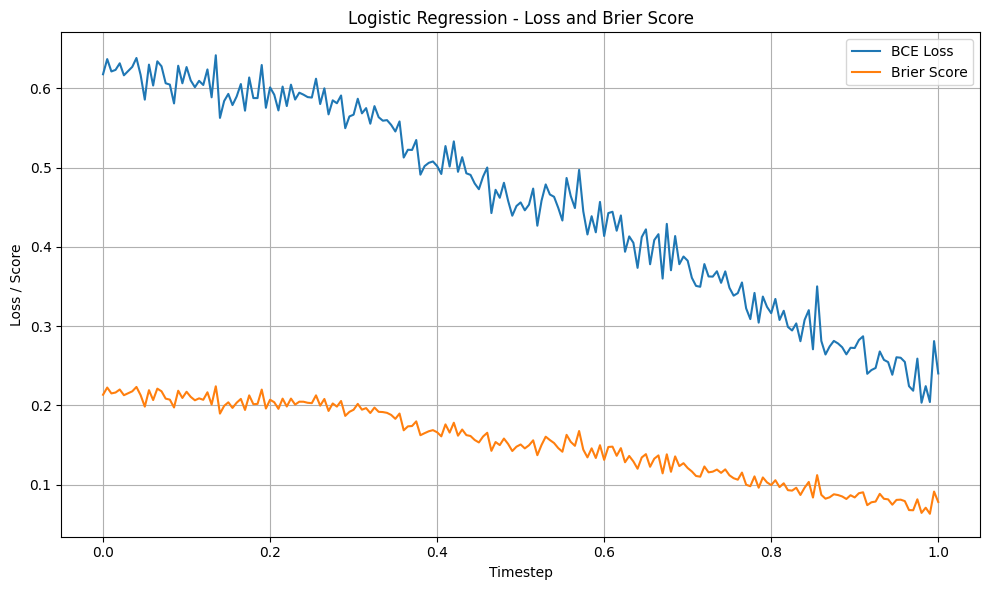

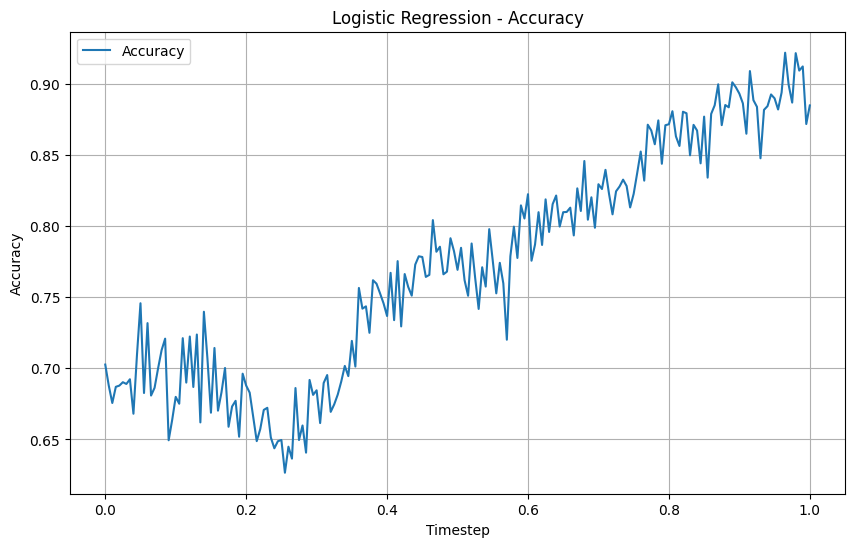

In [159]:
# # Test accuracy of model for each timestep on test data and plot
# accuracies = []
# timesteps = []
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")
process_data.plot_accuracy(models, test_data, "Logistic Regression")

In [156]:
# Save the model
import pickle
filename = 'logistic_regression_model.pickle'
pickle.dump(models, open(filename, 'wb'))

In [ ]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "LR_phat_b_model_no_type")

# For Debugging Purposes